# COVID-19 Case Rates for States in Mexico
[Work in progress]

This notebooks uses data from [COVID-19 Mexico, Gobierno de Mexico](https://coronavirus.gob.mx/datos)

In [1]:
import math
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import DateFormatter
from py2neo import Graph
import ipywidgets as widgets

In [2]:
pd.options.display.max_rows = None  # display all rows
pd.options.display.max_columns = None  # display all columsns

#### Connect to COVID-19-Net Knowledge Graph

In [3]:
graph = Graph("bolt://132.249.238.185:7687", user="reader", password="demo")

#### Select Metric to display

In [4]:
metric_widget = widgets.Dropdown(options=('confirmedRate', 'deathRate'), description='Metric')

In [5]:
display(metric_widget)

Dropdown(description='Metric', options=('confirmedRate', 'deathRate'), value='confirmedRate')

In [6]:
metric = metric_widget.value
print('Metric:', metric)

Metric: confirmedRate


In [7]:
# start date for time series
start_date = '2020-04-01'

#### Get confirmed cases and deaths for all counties in a state

In [8]:
query = """
// get all states (admin1) in Mexico
MATCH (a:Admin1)-[:IN]->(:Country{name: 'Mexico'})

// get COVID-19 cases for all states
MATCH (a)<-[:REPORTED_IN]-(c:Cases{source: 'GOBMX', aggregationLevel: 'Admin1'}) 
WHERE c.date >= date($start_date)

RETURN a.name AS name, c.date AS date, 
       c.cases*100000.0/c.population AS confirmedRate, 
       c.deaths*100000.0/c.population AS deathRate,
       c.cases AS cases,
       c.deaths AS deaths,
       c.population AS population
ORDER BY c.date ASC, a.name
"""
df = graph.run(query, start_date=start_date).to_data_frame()

In [9]:
df.tail(38)

,name,date,confirmedRate,deathRate,cases,deaths,population
4812,Aguascalientes,2020-08-31,399.474431,27.463431,5731,394,1434635
4813,Baja California,2020-08-31,467.334715,88.228789,16987,3207,3634868
4814,Baja California Sur,2020-08-31,966.437515,44.488187,7777,358,804708
4815,Campeche,2020-08-31,558.855186,74.554000,5592,746,1000617
4816,Chihuahua,2020-08-31,206.734891,30.356542,7859,1154,3801487
4817,Coahuila,2020-08-31,680.984988,43.868370,21919,1412,3218720
4818,Colima,2020-08-31,472.901460,51.709667,3713,406,785153
4819,Durango,2020-08-31,352.381707,24.344621,6586,455,1868996
4820,Guanajuato,2020-08-31,513.762057,34.616882,31998,2156,6228175
4821,Guerrero,2020-08-31,407.241032,46.786370,14893,1711,3657048


Reformat data

In [10]:
# convert neo4j date object to datetime
df['date'] = df['date'].astype(str)
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=False)  
# pivot table
df_date = df.pivot(index='date', columns='name', values=metric)
df_date.fillna(0, inplace=True)
df_date.head()

name,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Coahuila,Colima,Durango,Guanajuato,Guerrero,Hidalgo,Jalisco,Mexico,Mexico City,Michoacan,Morelos,Nayarit,Nuevo Leon,Oaxaca,Puebla,Queretaro,Quintana Roo,San Luis Potosi,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatan,Zacatecas
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-01,0.000000,6.740272,5.840628,0.000000,0.366469,1.104831,2.920416,0.891546,0.749065,0.931252,0.984401,1.490403,1.486380,2.352564,7.894756,0.683881,0.978446,0.000000,0.000000,0.675742,2.513456,1.798532,7.950053,0.000000,2.946139,1.073260,3.187825,0.903960,0.724632,0.550360,3.408440,0.000000
2020-04-02,0.000000,7.565612,7.207583,0.999383,0.401370,1.315275,3.603917,0.000000,0.000000,0.963364,1.011745,1.522803,1.581508,2.639463,8.693102,0.704605,1.369824,0.000000,1.711183,0.000000,2.801141,1.842399,8.588378,0.000000,3.833148,1.170829,3.770963,0.931353,0.797095,0.620619,3.541236,0.660095
2020-04-03,3.903432,8.611042,9.195882,1.099322,0.488625,1.446802,4.380623,0.000000,0.000000,1.043644,1.039089,1.620003,1.700419,2.932099,9.569065,0.828947,1.418746,0.853659,1.746833,0.748143,3.013119,1.973998,9.342763,0.000000,4.149938,1.203352,4.548482,1.177888,0.000000,0.714297,3.939625,0.000000
2020-04-04,0.000000,9.298825,9.817226,0.000000,0.506076,1.683552,4.722374,0.000000,0.000000,1.091813,1.093778,1.684803,1.724201,3.127189,10.201089,0.870394,1.565513,1.164080,1.800307,0.796410,3.179674,2.017865,9.806999,1.535165,4.530085,1.431013,4.665109,1.260066,0.942021,0.737717,4.028156,0.720104
2020-04-05,4.042840,9.849051,10.438569,1.399137,0.523527,2.025523,4.846647,0.000000,0.000000,1.139981,1.175812,1.749603,1.747983,3.362446,10.822025,0.911841,1.712280,1.319291,1.818132,0.844678,3.300804,0.000000,10.387295,1.604945,5.005268,1.496059,5.014992,1.369637,1.376801,0.761136,4.249484,0.780113


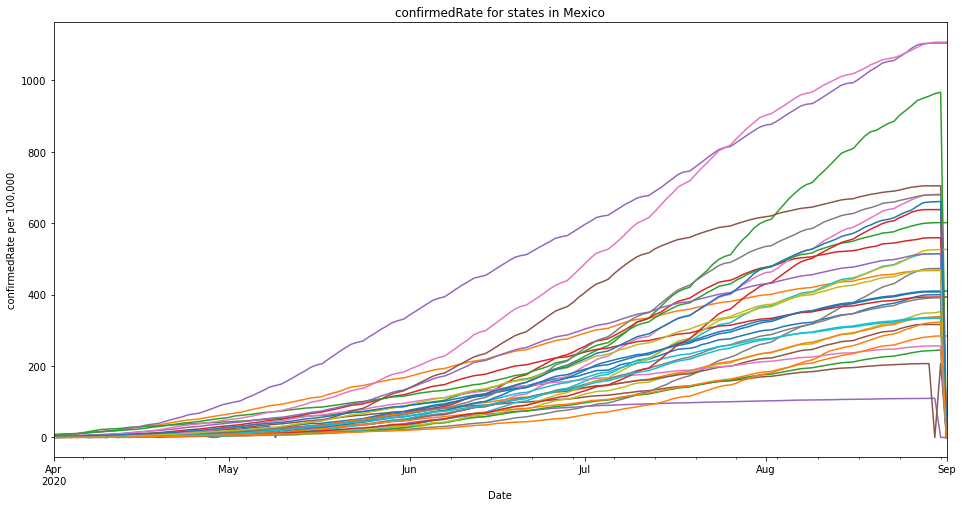

In [11]:
ax = df_date.plot(figsize=(16, 8), legend=False, title=f'{metric} for states in Mexico');
ax.set_xlabel('Date');
ax.set_ylabel(f'{metric} per 100,000');

### Case rate (per 100,000) by State

In [12]:
# dimensions for subplot layout
cols = 5
rows = math.ceil(df_date.shape[1]/cols)

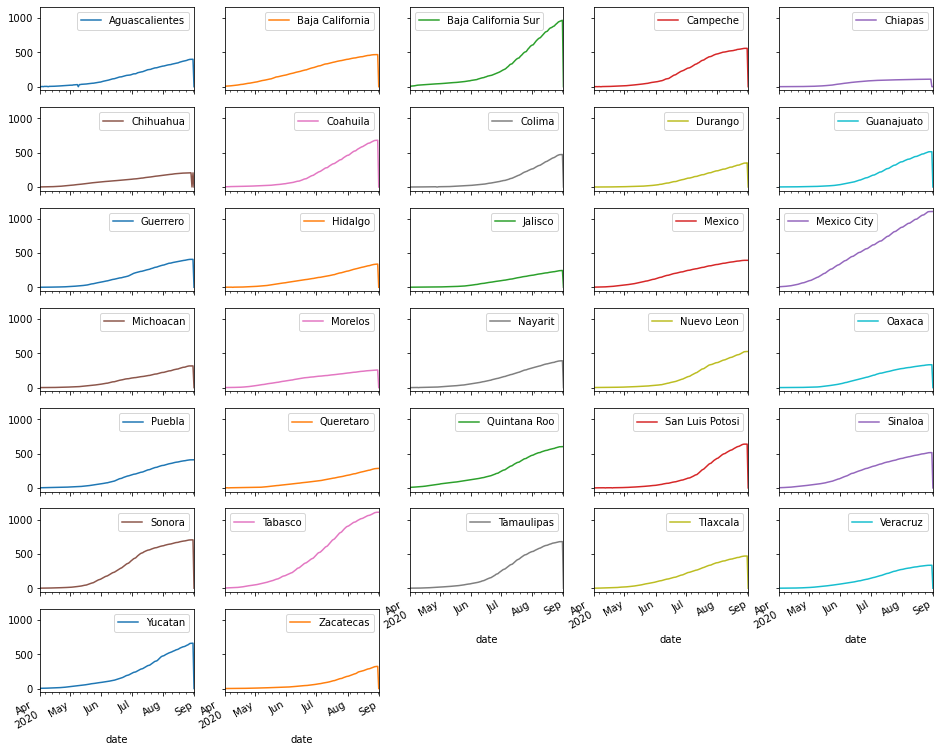

In [13]:
ax = df_date.plot(subplots=True, layout=(rows,cols), sharey=True, figsize=(16, 2*rows));